In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [2]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df = pd.read_csv(url)
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,94,110,110,120,170,174,237,273,281,299
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,174,186,197,212,223,243,259,277,304,333
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,367,409,454,511,584,716,847,986,1171,1251
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,224,267,308,334,370,376,390,428,439,466
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,4,5,7,7,7,8,8,8,10


In [3]:
df1 = df[df.columns.difference(['Province/State', 'Lat', 'Long'])]
df2 = df1.groupby('Country/Region').sum()
df3 = df2.unstack().reset_index() 
df3.columns = ['Date', 'Country/Region', 'Cumsum']
df3 = df3[df3.Cumsum >= 100]
df3['Date'] = pd.to_datetime(df3['Date'], format='%m/%d/%y')
df3 = df3.sort_values(by=['Country/Region','Date']).reset_index(drop=True)
start_date = df3[['Country/Region', 'Date']].groupby(['Country/Region']).min().reset_index()
start_date.columns = ['Country/Region', 'Startdate']
df4 = pd.merge(df3, start_date, on='Country/Region')
df4['Days'] = df4['Date'] - df4['Startdate']
df4['Days'] = df4['Days'].dt.days
df4.tail()

,Date,Country/Region,Cumsum,Startdate,Days
2157,2020-03-31,West Bank and Gaza,119,2020-03-29,2
2158,2020-04-01,West Bank and Gaza,134,2020-03-29,3
2159,2020-04-02,West Bank and Gaza,161,2020-03-29,4
2160,2020-04-03,West Bank and Gaza,194,2020-03-29,5
2161,2020-04-04,West Bank and Gaza,217,2020-03-29,6


In [4]:
def make_line(r, p, n, s):
    n_range = range(0, int(n/p + 1))
    dic = {'counts': [s*r**i for i in n_range], 'periods':[p*i for i in n_range]}
    return pd.DataFrame(dic)

d_2 = make_line(2, 2, 100, 100)
d_3 = make_line(2, 3, 100, 100)
d_5 = make_line(2, 5, 100, 100)
d_10 = make_line(2, 10, 100, 100)

In [5]:
d_c = df4[df4['Country/Region'] == 'Canada']
d_u = df4[df4['Country/Region'] == 'US']

In [6]:
# source: https://stackoverflow.com/questions/16992038/inline-labels-in-matplotlib
from math import atan2,degrees

#Label line with line2D label data
def labelLine(line,x,label=None,align=True,**kwargs):

    ax = line.axes
    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if (x < xdata[0]) or (x > xdata[-1]):
        print('x label location is outside data range!')
        return

    #Find corresponding y co-ordinate and angle of the line
    ip = 1
    for i in range(len(xdata)):
        if x < xdata[i]:
            ip = i
            break

    y = ydata[ip-1] + (ydata[ip]-ydata[ip-1])*(x-xdata[ip-1])/(xdata[ip]-xdata[ip-1])

    if not label:
        label = line.get_label()

    if align:
        #Compute the slope
        dx = xdata[ip] - xdata[ip-1]
        dy = ydata[ip] - ydata[ip-1]
        ang = degrees(atan2(dy,dx))

        #Transform to screen co-ordinates
        pt = np.array([x,y]).reshape((1,2))
        trans_angle = ax.transData.transform_angles(np.array((ang,)),pt)[0]

    else:
        trans_angle = 0

    #Set a bunch of keyword arguments
    if 'color' not in kwargs:
        kwargs['color'] = line.get_color()

    if ('horizontalalignment' not in kwargs) and ('ha' not in kwargs):
        kwargs['ha'] = 'center'

    if ('verticalalignment' not in kwargs) and ('va' not in kwargs):
        kwargs['va'] = 'center'

    if 'backgroundcolor' not in kwargs:
        kwargs['backgroundcolor'] = ax.get_facecolor()

    if 'clip_on' not in kwargs:
        kwargs['clip_on'] = True

    if 'zorder' not in kwargs:
        kwargs['zorder'] = 2.5

    ax.text(x,y,label,rotation=trans_angle,**kwargs)

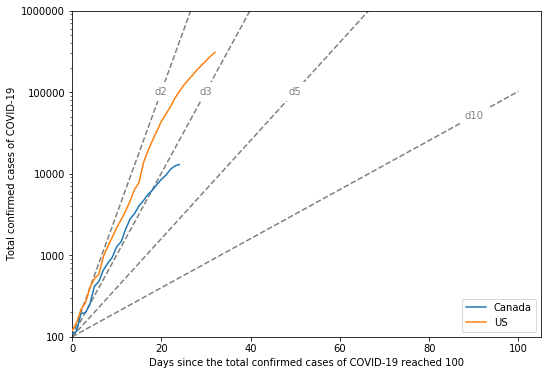

In [7]:
fig, ax = plt.subplots(figsize = (7*1.2, 5*1.2))
l2, = ax.plot(d_2.periods, d_2.counts, '--', color='gray', label='d2')
l3, = ax.plot(d_3.periods, d_3.counts, '--', color='gray', label='d3')
l5, = ax.plot(d_5.periods, d_5.counts, '--', color='gray', label='d5')
l10, = ax.plot(d_10.periods, d_10.counts, '--', color='gray', label='d10')
labelLine(l2,20)
labelLine(l3,30)
labelLine(l5,50)
labelLine(l10,90)
lc, = ax.plot(d_c.Days, d_c.Cumsum, zorder = 200)
lu, = ax.plot(d_u.Days, d_u.Cumsum, zorder = 200)
ax.set_yscale('log')
ax.set_ylim(top=10**6, bottom = 10**2)
ax.set_xlim(left=0)
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.set_xlabel('Days since the total confirmed cases of COVID-19 reached 100')
ax.set_ylabel('Total confirmed cases of COVID-19')
ax.legend((lc, lu), ('Canada', 'US'), loc = 'lower right')

In [8]:
fig.savefig('plot.png')

In [9]:
df4['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Belarus', 'Belgium', 'Bolivia', 'Bosnia and Herzegovina',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Cambodia',
       'Cameroon', 'Canada', 'Chile', 'China', 'Colombia',
       'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess',
       'Dominican Republic', 'Ecuador', 'Egypt', 'Estonia', 'Finland',
       'France', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guinea',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Korea, South', 'Kosovo', 'Kuwait',
       'Kyrgyzstan', 'Latvia', 'Lebanon', 'Lithuania', 'Luxembourg',
       'Malaysia', 'Malta', 'Mauritius', 'Mexico', 'Moldova',
       'Montenegro', 'Morocco', 'Netherlands', 'New Zealand', 'Nig